# NTLK BOOK. Chapter 2.

In [1]:
%pprint

Pretty printing has been turned OFF


In [1]:
import nltk
from nltk.corpus import state_union, brown, stopwords, gutenberg, wordnet as wn, nps_chat, udhr, names
from nltk import Text, FreqDist, ConditionalFreqDist, ConcordanceIndex

from matplotlib import pyplot
import random

Definimos unas variables que se utilizarán en varios ejercicios del capítulo.

In [3]:
punctuation = ". , : ; ! ? - < > ' ''  ` `` -- .' ,' ?' !' * --'".split() +\
'," ." ?" !" "'.split()
stops = nltk.corpus.stopwords.words('english')
stops_punct = stops + punctuation

### Exercise 4.

Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [4]:
su_cfd = ConditionalFreqDist(
          (fileid[:4], target)
          for fileid in state_union.fileids()
          for word in state_union.words(fileid)
          for target in ['men', 'women', 'people']          
          if word.lower()== target          
)
su_cfd.tabulate()

        men people  women 
1945      2     10      2 
1946     12     49      7 
1947      7     12      2 
1948      5     22      1 
1949      2     15      1 
1950      6     15      2 
1951      8     10      2 
1953      3     17      0 
1954      2     15      0 
1955      4     26      0 
1956      2     30      2 
1957      5     11      2 
1958      2     19      1 
1959      4     11      1 
1960      2     10      0 
1961      6     10      0 
1962      6     10      2 
1963      8     15      5 
1964      3      3      1 
1965     19     30      3 
1966     12     35      1 
1967     11     25      1 
1968      4     17      0 
1969      5      6      2 
1970      2     23      0 
1971      1     32      0 
1972      1      7      0 
1973      1      9      0 
1974      0     20      0 
1975      0     14      0 
1976      3     18      1 
1977      2     19      1 
1978      0     26      1 
1979      0     15      1 
1980      1     12      2 
1981      1     11      1 
1

"People" siempre ha sido más usado que "men" and "women".  

Antes de los finales de los 70, "men" era un poco más frecuente que "women", ya que en algunas ocasiones se utilizaba en lugar de "people".Sobre todo esto se nota en los discursos del presidente Johnson de los años 1965-1967.  

A partir del 1978 y salvo alguna excepción, "women" es más usado que "men", ya que se menciona en el contexto de discriminación.   

El pequeño repunte de "men" and "women" (en comparación con el uso de "people") en los años 2004-2006, durante el mandato de George W. Bush, podría tener que ver tanto con las preferencias lingüísticas del presidente como con la guerra en Irak, ya que en varias ocasiones "our men and women" se usa para referirse a los soldados luchando en Irak.

### Exercise 5

Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

In [5]:
my_synsets = [wn.synset('nose.n.01'), wn.synset('telephone.n.01'), wn.synset('tree.n.01'), wn.synset('water.n.01')]

for synset in my_synsets:
    print(synset.name(), '\t', synset.definition())
    print('is member of {} '.format(synset.member_holonyms()))
    print('its members are {}'.format(synset.member_meronyms()))
    print('is part of {} '.format(synset.part_holonyms()))
    print('its parts are {}'.format(synset.part_meronyms()))
    print('is as a substance used in {} '.format(synset.substance_holonyms()))
    print('is made of the following substances {}'.format(synset.substance_meronyms()))
    print('\n')

nose.n.01 	 the organ of smell and entrance to the respiratory tract; the prominent part of the face of man or other mammals
is member of [] 
its members are []
is part of [Synset('face.n.01'), Synset('upper_respiratory_tract.n.01')] 
its parts are [Synset('bridge.n.04'), Synset('ethmoidal_artery.n.01'), Synset('internasal_suture.n.01'), Synset('nasal_cavity.n.01'), Synset('nostril.n.01'), Synset('turbinate_bone.n.01')]
is as a substance used in [] 
is made of the following substances []


telephone.n.01 	 electronic equipment that converts sound into electrical signals that can be transmitted over distances and then converts received signals back into sounds
is member of [] 
its members are []
is part of [Synset('telephone_system.n.01')] 
its parts are [Synset('mouthpiece.n.02'), Synset('telephone_receiver.n.01')]
is as a substance used in [] 
is made of the following substances []


tree.n.01 	 a tall perennial woody plant having a main trunk and branches forming a distinct elevated 

### Exercise 7

According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [6]:
for category in brown.categories():
    text = brown.words(categories=category)
    print("Category: {}".format(category))
    print (ConcordanceIndex(text).print_concordance("However", width=200, lines=100))
    print('\n')
        

Category: adventure
Displaying 1 of 1 matches:
said . But suddenly those hot-honey eyes seemed to have everything but swarms of bees in them . However , when there's a job to be done , I'm a monstrosity of grim determination , I like to think . I
None


Category: belles_lettres
Displaying 16 of 16 matches:
sm was able to stave off the incipient socialist movement until well into the present century . However , in recent decades , for what doubtless are multiple reasons , an unannounced but nonetheless 
y and hit the Soviets without provocation ? ? Nobody can be absolutely certain of the answers . However , the system is designed , ingeniously and hopefully , so that no one man could initiate a ther
mehow or other have survived and which naturally enough are called `` historical monuments '' . However , just as all the buildings have not fallen and flowed back to their original mud , so the valu
r ? ? No , originally he had hoped to become a concert pianist and had even performed as suc

Displaying 16 of 16 matches:
 `` soft '' , and the people within them are ideally suited to destruction by nuclear weapons . However , because this vulnerability is mutual , it is to the advantage of neither side to destroy the 
 we have an effective spacecraft , the answer to the hunter-killer problem is manned aircraft . However , the aircraft which we have today are tied to large , `` soft '' airfields . Nuclear rockets c
, so is the carefree attitude toward what a boatman may and may not do ; ; must and should do . However , there is a minimum of legislative restriction on boating . Laws on boating vary according to 
ace as the work progresses to insure snug fitting . The order of fitting is not too important . However , we started with the first row of bars and worked our way back . Since the same method of shap
d . They involve only simple mathematics that are taught in grammar school arithmetic classes . However , it is essential that the various mathematical symbols used in the

Displaying 21 of 21 matches:
emies , could or would be willing to loose upon mankind such terrible and inhumane weapons . `` However , evidence that the Axis powers are making significant preparations indicative of such an inten
 understanding of dreams , enabling us to recognize their equivalents in our wakeful thoughts . However , readers who accept Freud's findings and believe that he has solved completely the mystery of 
 this is standard equipment for a man of your day ; ; your stock in trade ; ; your livelihood . However , the last few years of your life , things seem to be changing . Your way doesn't seem to be so
ies show that most tooth irregularity has at least its beginning in hereditary predisposition . However , this does not mean that a child's teeth or jaws must necessarily resemble those of someone in
heir expression as strictly extra-sensory perception ( ESP ) , on this side of the `` veil '' . However that may be , people are known to go to mediums for diverse reasons

Displaying 5 of 5 matches:
 on the highway , while representative music reinforced the mood of the late teens and 1920's . However well chosen and cleverly arranged , such memorabilia unfortunately amounted to more of an inter
all translation from the German may not convey quite everything Mr. Remarque hoped to tell us . However , my principal objection in this sort of novel is to the hackneyed treatment of race-drivers , 
lieves that she can buy anything with dollars , and that she compulsively strives to be liked . However , she really does not know how to match the quantity of dollars given away by a quality of lead
possibly have gone down in history as a political failure if it had not been for Hitler's war . However , Montgomery makes little contribution to leadership theory and practice . Most of what is said
the contemporary scene . Like Eisenhower , he holds the militarist's suspicion of politicians . However , at the same time Montgomery selects as his hero De Gaulle , who is 

El método "concordance" de nltk es case-insensitive, por eso utilizo la clase ConcordanceIndex que sí permite sacar las concordancias solo para las palabras que empiezan en mayúsculas y así, es decir solo para los casos en los que "however" está al principio de una oración.  

De los más de 170 casos de uso de "however" al inicio de una oración en el Brown Corpus, solo 8, bajo mi opinión, podrían ser sustituidos por "to whatever extent", lo que nos lleva a pensar que se trata de un uso no muy frecuente.

### Exercise 8.

Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females.

In [7]:
for fileid in names.fileids():
    print("There are {} {} names".format(len(names.words(fileid)), fileid[:-4]))

gender_cfd = ConditionalFreqDist(
          (fileid[:-4], first_name[0])
          for fileid in names.fileids()
          for first_name in names.words(fileid)              
)
gender_cfd.tabulate()

There are 5001 female names
There are 2943 male names
         A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z 
female 443 246 469 308 251 144 213 124  83 293 276 332 484 158  66 121   9 247 309 198  14 105  54   5  18  31 
  male 213 173 166 146 119  87 156 163  45 144  70 113 200  77  52 101  15 200 238 188  22  50 151   7  16  31 


Hay más nombres masculinos que femeninos en el corpus, por lo que si quisieramos comparar las frecuencias deberíamos primero haberlas normalizado. Sin embargo, a simple vista ya se puede ver que el porcentaje de nombres en "H", "O", "Q", "T", "U", "W", "X", "Y", "Z" entre los nombres masculinos es más elevado que entre los femeninos.

### Exercise 9

Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [8]:
files = ['chesterton-thursday.txt', 'carroll-alice.txt']
texts = [Text(gutenberg.words(file), file) for file in files]
words = "rich poor".split()
row_format = '{:<25} {:<10} {:<10} {:<10} {:<10}'

def text_richness(file):
    tokens = len(text)
    types = len(set(text))
    lexical_diversity = round(types/tokens, 2)
    stops_num = 0
    for word in text:
        if word in stops:
            stops_num += 1
    stops_part = round(stops_num/tokens, 2)
    return(tokens, types, lexical_diversity, stops_part)

def get_dist(text, stops=None):
    text = [w.lower() for w in text]
    if stops:
        text = [w for w in text if w not in stops_punct]
    fdist = FreqDist(text)
    return fdist

def get_collocations(text):
    return text.collocations(35)

def get_concordance(word, text):
    return text.concordance(word)
    
    
print(row_format.format('', 'tokens', 'types', 'diversity', 'stopwords'))

for text in texts:
    tokens, types, lexical_diversity, stops_part = text_richness(text)
    print(row_format.format(text.name, tokens, types, lexical_diversity, stops_part))

print('\n\n')

for text in texts:
    print("Collocations: ", text.name)
    print(get_collocations(text))
    print ('\n\n')

for text in texts:
    print(get_dist(text, stops + punctuation).most_common(50))
    print ('\n\n')
    
for word in words:
    for text in texts:
        print(word, ': ', text.name)
        print(get_concordance(word, text))
        print('\n\n')

                          tokens     types      diversity  stopwords 
chesterton-thursday.txt   69213      6807       0.1        0.39      
carroll-alice.txt         34110      3016       0.09       0.38      



Collocations:  chesterton-thursday.txt
said Syme; asked Syme; Saffron Park; Comrade Gregory; Leicester
Square; Colonel Ducroix; red hair; old gentleman; could see; Inspector
Ratcliffe; Anarchist Council; blue card; Scotland Yard; dark room;
blue eyes; common sense; straw hat; hundred yards; said Gregory; run
away; first time; Supreme Council; white road; old man; looked like;
police station; burning gold; Gabriel Syme; low voice; waistcoat
pocket; young man; grew larger; Baker Street; Chinese lanterns; right
enough
None



Collocations:  carroll-alice.txt
Mock Turtle; said Alice; March Hare; White Rabbit; thought Alice;
golden key; beautiful Soup; white kid; good deal; kid gloves; Mary
Ann; yer honour; three gardeners; play croquet; Lobster Quadrille;
ootiful Soo; great hurry;

He comparado "The Man Who Was Thursday" de Chesterton con "Alice in Wonderland" de Carrol.

Los textos tienen unos índices de diversidad léxica casi idénticos (0,1 y 0,09) y la parte del texto ocupada por stopwords también es casi la misma (0.39 y 0.38).

De las colocaciones de "The Man Who Was Thursday" se desprende que se podría tratar de una novela policíaca ("Inspector Ratcliffe", "Scotland Yard", "police station"). Y basándonos en las colocaciones de "Alice", podemos deducir que muchos de los personajes son animales ("Mock Turtle", "March Hare", etc.), por lo que debería tratarse de un cuento fantástico. También algunas colocaciones parecen indicar que en el libro hay mucho diálogo ("said Alice", "trembling voice", "dead silence", "yer honor", "Alice replied").

Finalmente he mirado las concordancias de "rich" and "poor" en los dos textos. En el texto de Chesterton ambas palabras se usan tanto en relación con la situación económica de una persona o entidad ("rich man", "the poor have been rebels"), como en el sentido figurativo de "abundante" o "suntuoso" para "rich" ("rich athmosphere") y de desgraciado para "poor" ("poor old Colonel"). En el libro de Carrol la riqueza material, al parecer, no tiene mucha transcendencia. "Rich" se usa solo una vez para hablar de la sopa, mientras que "poor" se utiliza 27 veces y casi siempre para expresar compasión ("poor Alice", "poor little things", "my poor hands").

### Exercise 10

Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [9]:
categories = ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies',
'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance',
'science_fiction']


def types_in_part(fdist, n):
    # Set the number of tokens corresponding to n% of all the tokens
    mark = fdist.N() * n
    tokens = 0
    for count, (word, freq) in enumerate(fdist.most_common()):
        tokens += freq
        if tokens >= mark:
            types_number = count + 1
            break
    return types_number

brown_cfdist = ConditionalFreqDist(
        (category, word.lower())
        for category in categories
        for word in brown.words(categories=category)
        if word.lower() not in stops_punct
    )

for fdist in brown_cfdist:
    length = len(brown_cfdist[fdist])
    types = types_in_part(brown_cfdist[fdist], 0.33)
    print("Category: {}. \nNumber of types in category: {}. "
          "\nWord types accounting for 1/3 of tokens: {}."
          "\n% of types accounting for 1/3 of tokens: {}.\n"
          .format(fdist, length, types, round(types/length,2)))
    

Category: adventure. 
Number of types in category: 8158. 
Word types accounting for 1/3 of tokens: 239.
% of types accounting for 1/3 of tokens: 0.03.

Category: belles_lettres. 
Number of types in category: 16923. 
Word types accounting for 1/3 of tokens: 413.
% of types accounting for 1/3 of tokens: 0.02.

Category: editorial. 
Number of types in category: 8977. 
Word types accounting for 1/3 of tokens: 345.
% of types accounting for 1/3 of tokens: 0.04.

Category: fiction. 
Number of types in category: 8547. 
Word types accounting for 1/3 of tokens: 257.
% of types accounting for 1/3 of tokens: 0.03.

Category: government. 
Number of types in category: 7233. 
Word types accounting for 1/3 of tokens: 242.
% of types accounting for 1/3 of tokens: 0.03.

Category: hobbies. 
Number of types in category: 10690. 
Word types accounting for 1/3 of tokens: 390.
% of types accounting for 1/3 of tokens: 0.04.

Category: humor. 
Number of types in category: 4622. 
Word types accounting for 1/3 

Creo que para poder comparar estos números deberíamos ver el porcentaje y no el número absoluto de los types que forman 1/3 de los tokens.  

Parece que "science fiction", "humor" y "reviews" son las categorías en las que las palabras más comunes ocupan un menor porcentaje del número total de tokens. Por el momento, no se me ocurre ninguna explicación.

### Exercise 13

What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [10]:
all_sets = list(wn.all_synsets('n'))
hypless = 0

for synset in all_sets:
    if not len(synset.hyponyms()):
        hypless += 1
   
print('{} percent of nouns have no hyponyms.'.format(round(hypless/len(all_sets)*100, 2)))

79.67 percent of nouns have no hyponyms.


### Exercise 14

Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [11]:
def supergloss(s):
    data = []
    data.append(s.definition())
    for nyms in [s.hypernyms(), s.hyponyms()]:
        for synset in nyms:
            data.append(synset.definition())
    return '\n '.join(data)

print(supergloss(wn.synset('table.n.01')))
    

a set of data arranged in rows and columns
 an orderly arrangement
 a table of statistical data
 a tabular array of the days (usually for one year)
 a list of divisions (chapters or articles) and the pages on which they start
 a two-way tabulation of the relations between correlates; row headings are the scores on one variable and column headings are the scores on the second variables and a cell shows how many times the score on that row was associated with the score in that column
 the part of a floppy disk or hard disk where information is stored about the location of each piece of information on the disk (and about the location of unusable areas of the disk)
 (chemistry) a tabular arrangement of the chemical elements according to atomic number as based on the periodic law


### Exercise 15

Write a program to find all words that occur at least three times in the Brown Corpus.

In [12]:
def word_occurence(text, min_freq):
    text = [w.lower() for w in text]
    fdist = FreqDist(text)
    common_words = sorted([w for w in set(text) if fdist[w] >= min_freq])
    return common_words

brown_3 = word_occurence(brown.words(), 3)
print("There are {} words that occur at least 3 times in the Brown corpus.".format(len(brown_3)))

There are 20615 words that occur at least 3 times in the Brown corpus.


### Ejercicio 16

Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [13]:
categories = nltk.corpus.brown.categories()
for category in brown.categories():
    words = brown.words(categories=category)
#     words = [word.lower() for word in words]
    lexical_diversity =  len(set(words)) / len(words)
    print(category, round(lexical_diversity, 3), len(words))

adventure 0.128 69342
belles_lettres 0.106 173096
editorial 0.161 61604
fiction 0.136 68488
government 0.117 70117
hobbies 0.145 82345
humor 0.231 21695
learned 0.093 181888
lore 0.131 110299
mystery 0.122 57169
news 0.143 100554
religion 0.162 39399
reviews 0.212 40704
romance 0.121 70022
science_fiction 0.223 14470


Las tres categorías con menor diversidad léxica son las de "learned", "belles lettres" y "government". Para "government" esto se podría explicar por el hecho de que se trata de un área muy específica que excluye casi por completo el uso de vocabulario propio del lenguaje coloquial, periodístico, etc. En el caso de "government" y "learned" la única explicación que se me ocurre es que los dos son de mayor extensión que el resto de los subcorpous de Brown (un texto de 10000 tendría una menor diversidad léxica que uno de 100). De este mismo modo podríamos explicar la diversidad en las categorías de "science fiction", "reviews" y "religion".

### Exercise 17

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [14]:
def most_frequent_50(text):
    text = [word for word in text if word.lower() not in stops]
    fdist = FreqDist(text)
    return fdist.most_common(50)

most_frequent_50(brown.words(categories='fiction'))

[(',', 3654), ('.', 3639), ('``', 703), ("''", 698), ('?', 564), (';', 318), ('would', 287), ('!', 284), ('said', 192), ('--', 176), ('one', 168), ('could', 166), ('like', 147), ('man', 111), ('back', 102), ('time', 99), ('came', 91), (':', 84), ('little', 81), ('went', 79), ('get', 78), ('thought', 76), ('old', 75), ('know', 75), ('go', 72), ('men', 72), ('looked', 72), ('around', 71), ('never', 71), ('two', 68), ('room', 63), ('way', 62), ('eyes', 60), ('made', 60), ('knew', 59), ('face', 58), ('felt', 58), ('saw', 58), ('even', 57), ('see', 57), ('good', 55), ('seemed', 55), ('still', 55), ("don't", 55), ('come', 55), ('away', 55), ('must', 55), ('house', 54), ('head', 54), ('long', 53)]

### Exercise 18

Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [15]:
def most_frequent_bigrams(sents, num):
    bigrams = []
    for sent in sents:
        bigrams += list(nltk.bigrams(sent))
    bigrams = [(w_1, w_2) for (w_1, w_2) in bigrams 
               if w_1.lower() not in stops_punct 
               and w_2.lower() not in stops_punct]
    fdist = FreqDist(bigrams)
    return fdist.most_common(num)

most_frequent_bigrams(brown.sents(categories='fiction'), 50)

[(('Linda', 'Kay'), 17), (('Bobby', 'Joe'), 15), (('Miss', 'Ada'), 15), (('could', 'see'), 14), (("don't", 'know'), 13), (('old', 'man'), 12), (('Simms', 'Purdew'), 12), (('Big', 'Hans'), 12), (('Mr.', 'Jack'), 12), (('New', 'York'), 10), (('Uncle', 'Randolph'), 9), (('living', 'room'), 8), (("didn't", 'know'), 8), (("don't", 'care'), 8), (('would', 'say'), 7), (('Cousin', 'Simmons'), 7), (('Pedersen', 'kid'), 7), (('Mr.', 'McKinley'), 6), (('would', 'come'), 6), (('Amen', 'corner'), 6), (('Kent', 'House'), 6), (('one', 'thing'), 6), (('looked', 'like'), 6), (('came', 'back'), 6), (('Jean', 'Jacques'), 6), (('Rector', 'said'), 6), (('Mrs.', 'Pastern'), 6), (('Mr.', 'Flannagan'), 6), (("I've", 'never'), 6), (('never', 'done'), 6), (('young', 'man'), 5), (('front', 'door'), 5), (('machine', 'gun'), 5), (('Vice', 'President'), 5), (('Black', 'Bottom'), 5), (('ten', 'years'), 5), (('nigger', 'boy'), 5), (('Harry', 'Hawk'), 5), (('looked', 'around'), 5), (('would', 'make'), 5), (('first', '

Además de los stopwords he omitido también los signos de puntuación.  

En vez de pasarle una lista de palabras a la función le paso una lista de oraciones, así se evita que se considere como bigram la combinación de la última y primera palabras de las frases adyacentes.

### Exercise 19

Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

In [16]:
my_words = ["can't", "cannot"]
categories = brown.categories()

cfd = ConditionalFreqDist(
    (category, target)
    for category in categories
    for word in brown.words(categories=category)
    for target in my_words
    if word.lower() == target
)

cfd.tabulate()

                 can't cannot 
      adventure     22      1 
 belles_lettres     12     52 
      editorial     12     32 
        fiction     11      4 
     government      2     12 
        hobbies      7     23 
          humor      7      5 
        learned      2     56 
           lore     14     23 
        mystery     26      0 
           news     15     15 
       religion      0     22 
        reviews      2      6 
        romance     30      6 
science_fiction      7      1 


Hemos comparado el uso de "can't" y "cannot" en los texto de distintas categorías. Como era de esperar, "can't" es más presente que "cannot" en las cateogrías que corresponde a las novelas, ya que en éstas se imita mucho el lenguaje coloquial. En las noticias "can't" se usa con la misma frecuencia que "cannot", lo que se podría atribuir a la abundancia de citas directas en las noticias. En las demás categorías vemos una mayor frecuencia de "cannot".  

### Exercise 20

Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [17]:
def word_freq(word, section):
    text = brown.words(categories=section)
    text = [w.lower() for w in text]
    fdist = FreqDist(text)
    return fdist[word]

word_freq('my', 'fiction')

131

### Exercise 22

Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [18]:
def hedge(text):
    new_text = []
    order = 0
    for word in text:
        new_text.append(word)
        order += 1
        if order == 3:
            if word not in punctuation:
                new_text.append('like')
                order = 0
            else:
                order = 2
    return new_text

hedge(brown.words(categories='fiction'))[:70]

['Thirty-three', 'Scotty', 'did', 'like', 'not', 'go', 'back', 'like', 'to', 'school', '.', 'His', 'like', 'parents', 'talked', 'seriously', 'like', 'and', 'lengthily', 'to', 'like', 'their', 'own', 'doctor', 'like', 'and', 'to', 'a', 'like', 'specialist', 'at', 'the', 'like', 'University', 'Hospital', '--', 'Mr.', 'like', 'McKinley', 'was', 'entitled', 'like', 'to', 'a', 'discount', 'like', 'for', 'members', 'of', 'like', 'his', 'family', '--', 'and', 'like', 'it', 'was', 'decided', 'like', 'it', 'would', 'be', 'like', 'best', 'for', 'him', 'like', 'to', 'take', 'the']

### Exercise 23

Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

a. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?

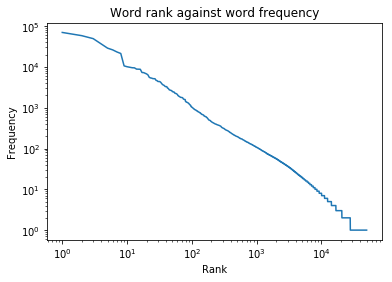

In [19]:
def plot_rank_freq(text):
    text = [w.lower() for w in text]
    fdist = FreqDist(text)
    word_freq = fdist.most_common()
    ranks, freqs = list(), list()
    for count, tupla in enumerate(word_freq):
        ranks.append(count+1)
        freqs.append(tupla[1])
    pyplot.plot(ranks, freqs)
    pyplot.title('Word rank against word frequency')
    pyplot.xlabel('Rank')
    pyplot.ylabel('Frequency')
    pyplot.yscale('log')
    pyplot.xscale('log')
    pyplot.show()

plot_rank_freq(brown.words())

La ley de Zipf no funciona en los extremos. En un texto normal, es prácticamente imposible que el primer type más común sea 2 veces más frecuente que el segundo más común. En el otro extremo, el type número 25000 y el número 50000 y todos los que están entre ellos y los siguen tendrán una frecuencia de 1.

b. Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

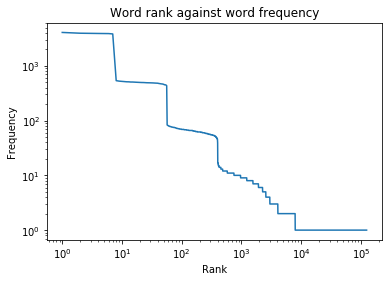

In [20]:
alpha_string = "abcdefg "
random_string = str()
for i in range(2000000):
    random_string += random.choice(alpha_string)
random_words = random_string.split()

plot_rank_freq(random_words)
    

Este plot se desvía más aún de la ley de Zipf y no solo en los extremos. Creo que es debido a que las palabras de la misma longitud tienden a tener unas frecuencias muy similares. En una distribución sacada de un texto normal un type de dos letras puede darse 1 o 1000 veces, mientras que aquí eso no va a suceder. Por la misma razón, ciertas frecuencias simplemente nunca se van dar, de ahí este gráfico en "escalones". 

### Exercise 24

Modify the text generation program in 2.2 further, to do the following tasks:

a. Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)  


b. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.

In [21]:
def generate_model(cfdist, word, length, candidates_number):
    for i in range(length):
        print(word, end=' ')
        candidates = [candidate for (candidate, frequency) in cfdist[word].most_common(candidates_number)]
        word = random.choice(candidates)

categories = ['fiction', 'news']
candidates_nums = [3,6,10,15,40]
words = ['the', 'orange']

for category in categories:
    bigrams = nltk.bigrams(brown.words(categories=category))
    cfd = nltk.ConditionalFreqDist(bigrams)
    print(category)
    print('\n')
    for word in words:
        print('The word is {}'.format(word), '\n')
        for cand_num in candidates_nums:
            print('Choosing from {} bigrams:'.format(cand_num), end=' ')
            try:
                generate_model(cfd, word, 40, cand_num)
            except IndexError:
                print("No such word.")
                break
            else:
                print('\n')
        print('\n') 
    print('\n')            
                

fiction


The word is the 

Choosing from 3 bigrams: the road and a man . `` You want to the same way . He had been in his head . The man to his face was a little girl , he had been sitting in his head . `` 

Choosing from 6 bigrams: the door of a moment the door of his head . She had not be , a few words many enchained demons straining in my arm , `` I am weary hound in a big house and a good , 

Choosing from 10 bigrams: the kitchen Mama announced another time to see her own . It could have had to do it for white working stiff figure in their places , but it with his body ; and then his head up to go 

Choosing from 15 bigrams: the hall and in all day He was a small parlor . I don't 'low nigras to see her mind doing it had left . They were , and that a little operetta '' in the hall he felt he 

Choosing from 40 bigrams: the kitchen bar was about when the old portraits in trouble and they approached the kitchen Mama Albright said anything that . You heard himself says Voltaire is ful

Creo que la "inteligibilidad" del texto generado no cambia dependiendo del número de bigrams de los que se elige al azar la siguiente palabra, lo que sí cambia, obviamente, es la diversidad de las palabras utilizadas. 

También cuanto menos frecuente la palabra por la que empezamos (por ejemplo, "orange"), más probable que generemos unos resultados parecidos, al menos en la primera parte. 

   ### Exercise 25

Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [22]:
f

def find_language(word):
    languages_with_word = [language for language in languages
                          if word.lower() in [w.lower() for w in udhr.words(language)]]
    return languages_with_word

find_language('human')

['English-Latin1', 'Interlingua-Latin1', 'NigerianPidginEnglish-Latin1', 'SolomonsPidgin_Pijin-Latin1', 'TokPisin-Latin1', 'Yao-Latin1']

### Exercise 26

What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [23]:
all_sets = list(wn.all_synsets('n'))
total_hyponyms = 0
sets_with_hyponyms = 0

for sset in all_sets:
    if sset.hyponyms():
        total_hyponyms += len(sset.hyponyms())
        sets_with_hyponyms += 1
average_hyponyms = total_hyponyms / sets_with_hyponyms
round(average_hyponyms, 2)


4.54

### Exercise 27

The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [24]:
poses = ['n', 'v', 'a', 'r']

for pos in poses:
    all_sets = wn.all_synsets(pos)
    words = [lemma.name() 
             for synset in list(all_sets) 
             for lemma in synset.lemmas()]
    words = set(words)
    synsets_number = 0
    for word in words:
        synsets_number += len(wn.synsets(word, pos))
    average_synsets_number = synsets_number / len(words)
    print(pos, round(average_synsets_number, 2))
        

n 1.28
v 2.19
a 1.41
r 1.25


### Exercise 28

Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [25]:
pairs = [{'words': ('car', 'automobile')}, {'words': ('gem', 'jewel')}, {'words': ('journey', 'voyage')},
         {'words': ('boy', 'lad')}, {'words': ('coast', 'shore')}, {'words': ('asylum', 'madhouse')}, 
         {'words': ('magician', 'wizard')}, {'words': ('midday', 'noon')}, {'words': ('furnace', 'stove')}, 
         {'words': ('food', 'fruit')}, {'words': ('bird', 'cock')}, {'words': ('bird', 'crane')}, 
         {'words': ('tool', 'implement')}, {'words': ('brother', 'monk')}, {'words': ('lad', 'brother')}, 
         {'words': ('crane', 'implement')}, {'words': ('journey', 'car')}, {'words': ('monk', 'oracle')}, 
         {'words': ('cemetery', 'woodland')}, {'words': ('food', 'rooster')}, {'words': ('coast', 'hill')}, 
         {'words': ('forest', 'graveyard')}, {'words': ('shore', 'woodland')}, {'words': ('monk', 'slave')},
         {'words': ('coast', 'forest')}, {'words': ('lad', 'wizard')}, {'words': ('chord', 'smile')}, 
         {'words': ('glass', 'magician')}, {'words': ('rooster', 'voyage')}, {'words': ('noon', 'string')}]


for pair in pairs:
    # compare each word1 synset with each word2 synset
    # and get the highest score
    highest_score = 0
    for synset1 in wn.synsets(pair['words'][0]):
        for synset2 in wn.synsets(pair['words'][1]):
            score = wn.path_similarity(synset1, synset2)
            try:
                if score > highest_score:
                    highest_score = score
            except TypeError:
                continue
    pair['score'] = round(highest_score, 2)

sorted_by_score = sorted(pairs, key=lambda k: k['score'], reverse=True)

for elm in sorted_by_score:
    print("Pair: {}. Score: {}\n".format(elm['words'], elm['score']))

Pair: ('car', 'automobile'). Score: 1.0

Pair: ('gem', 'jewel'). Score: 1.0

Pair: ('magician', 'wizard'). Score: 1.0

Pair: ('midday', 'noon'). Score: 1.0

Pair: ('journey', 'voyage'). Score: 0.5

Pair: ('boy', 'lad'). Score: 0.5

Pair: ('coast', 'shore'). Score: 0.5

Pair: ('asylum', 'madhouse'). Score: 0.5

Pair: ('bird', 'cock'). Score: 0.5

Pair: ('tool', 'implement'). Score: 0.5

Pair: ('brother', 'monk'). Score: 0.5

Pair: ('bird', 'crane'). Score: 0.25

Pair: ('lad', 'brother'). Score: 0.2

Pair: ('crane', 'implement'). Score: 0.2

Pair: ('coast', 'hill'). Score: 0.2

Pair: ('shore', 'woodland'). Score: 0.2

Pair: ('monk', 'slave'). Score: 0.2

Pair: ('lad', 'wizard'). Score: 0.2

Pair: ('coast', 'forest'). Score: 0.17

Pair: ('monk', 'oracle'). Score: 0.12

Pair: ('chord', 'smile'). Score: 0.12

Pair: ('glass', 'magician'). Score: 0.12

Pair: ('cemetery', 'woodland'). Score: 0.11

Pair: ('forest', 'graveyard'). Score: 0.11

Pair: ('furnace', 'stove'). Score: 0.1

Pair: ('food'

La clasificación de Miller y Charles con los scores se puede ver por ejemplo [aquí](https://arxiv.org/ftp/arxiv/papers/1204/1204.0245.pdf).  

El ranking generado por wordnet en general no se aparta mucho del de Miller y Charles, aunque hay excepciones: por ejemplo, para Miller y Charles la pareja 'lad-wizard' ocupa el quinto sitio desde el final, mientras que aquí está a la mitad del ranking con un score de 0.2.

## Extra exercise

Hemos descubierto que el gráfico 1.2 del capítulo 2 no corresponde a la función que supuestamente lo genera. La función pretende "to examine the differences in word lengths for a selection of languages included in the udhr corpus" devuelve una distribución con valores absolutos, mientras en el gráfico del libro vemos unos porcentajes. Este es mi intento de modificar la función para poder generar un gráfico similar al del libro. Para simplificar las cosas solo he incluido dos lenguas en mi distribución.

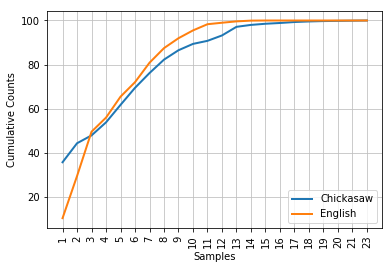

In [26]:
from copy import copy, deepcopy

languages = ['Chickasaw', 'English']
cfd = nltk.ConditionalFreqDist(
      (lang, len(word))
      for lang in languages
      for word in udhr.words(lang + '-Latin1'))

rel_cfd = deepcopy(cfd) # Creamos una copia de la distribución condicional

# Creamos copias de cada una de las distribuciones de frecuencias
rel_fd1 = copy(cfd['Chickasaw'])
rel_fd2 = copy(cfd['English'])

def fdist_per(fd, i=100):
    """In a frequency distribution, replace absolute frequencies
    by relative frequencies per every i items.
    """
    length = fd.N()
    for key, value in fd.items():
        fd[key] = round(value / length * i, 3)
    return fd

#sustituimos las distribuciones con valores absolutos por distribuciones con valores relativos
rel_cfd['Chickasaw'] = fdist_per(rel_fd1)
rel_cfd['English'] = fdist_per(rel_fd2)


rel_cfd.plot(cumulative=True)